In [2]:
import pandas as pd
import tabulate
import matplotlib.pyplot as plt

# This didn't initally work - needed to manually go in and delete row 131677 and then set low_memory
dat = pd.read_csv('crimestat.csv', low_memory=False, on_bad_lines='skip')

In [3]:
# Confirm data loaded
dat.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


In [4]:
# get an idea of crime by zip codes
print(dat['ZIP'].value_counts())

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
           ... 
85203.0       1
85266.0       1
85381.0       1
85268.0       1
85212.0       1
Name: ZIP, Length: 98, dtype: int64


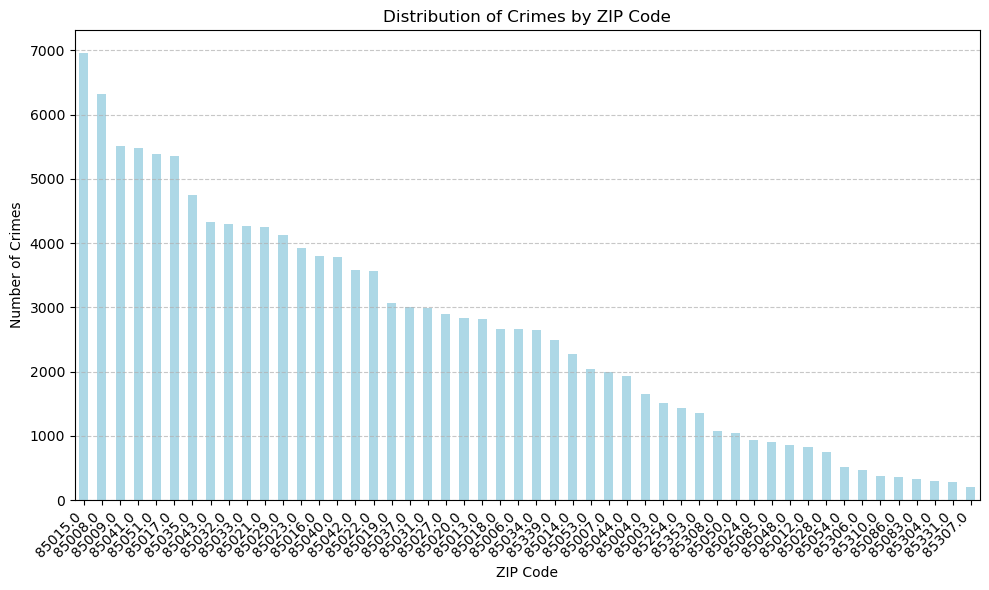

In [5]:
# store zip value counts to graph it
zip_counts = dat['ZIP'].value_counts()

# filter out zip codes with fewer than 100 crimes
zip_counts_impactful = zip_counts[zip_counts >99]

# create a bar plot
plt.figure(figsize=(10, 6))  # adjust figure size
zip_counts_impactful.plot(kind='bar', color='lightblue')  # soften color
plt.title('Distribution of Crimes by ZIP Code')  # title
plt.xlabel('ZIP Code')  # x-axis label
plt.ylabel('Number of Crimes')  # y-axis label
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # add grid lines
plt.tight_layout()  # adjust layout to prevent overlap
plt.show()

In [6]:
top_10_zip = dat['ZIP'].value_counts().nlargest(10)
print(top_10_zip)

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
85017.0    5356
85035.0    4752
85043.0    4331
85032.0    4301
85033.0    4258
Name: ZIP, dtype: int64


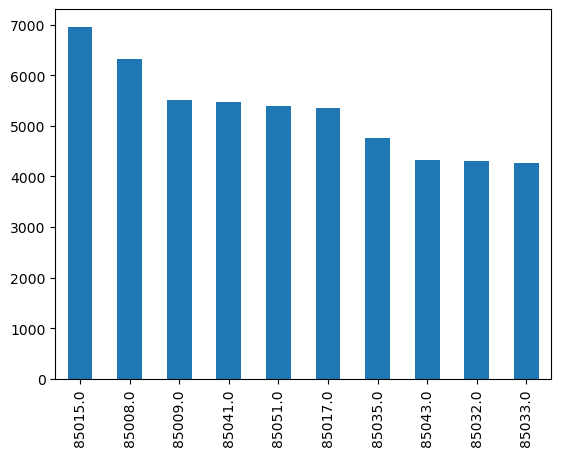

In [7]:
top_10_zip = dat['ZIP'].value_counts().nlargest(10).plot.bar()

Large numbers can be a over (or sometimes under) represent what is happening. Let's adjust each zip code to the proportion of total crimes.

In [8]:
total_crimes = len(dat)

In [9]:
# create proportion
zip_proportions = zip_counts / total_crimes

In [10]:
top_10_zip = zip_proportions.nlargest(10)

In [11]:
print("Zip code(s) with the highest proportion of crime:", top_10_zip)

Zip code(s) with the highest proportion of crime: 85015.0    0.052880
85008.0    0.047997
85009.0    0.041868
85041.0    0.041595
85051.0    0.040926
85017.0    0.040676
85035.0    0.036089
85043.0    0.032891
85032.0    0.032664
85033.0    0.032337
Name: ZIP, dtype: float64


<AxesSubplot: >

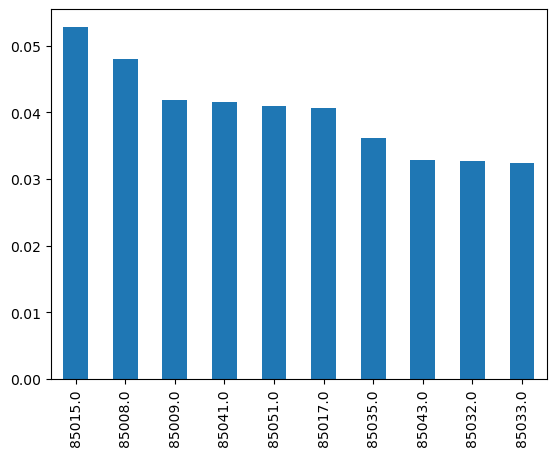

In [12]:
top_10_zip.plot.bar()

No meaningful differences in the zip codes with the most criminal activity. Let's look at what types of crimes are happening - I know I'd rather live in an area with a lot of petty crime and no murders than a crime with no thefts and murders all the time...

In [13]:
group_crime = dat.groupby(["UCR CRIME CATEGORY", "ZIP"])

In [14]:
crime_counts = group_crime.size()

In [15]:
top_murders = crime_counts['MURDER AND NON-NEGLIGENT MANSLAUGHTER'].nlargest(10)

In [16]:
print(top_murders)

ZIP
85008.0    20
85015.0    19
85043.0    16
85007.0    15
85033.0    15
85041.0    14
85009.0    13
85006.0    12
85017.0    12
85032.0    12
dtype: int64


Okay... so the top 10 list is still not a great place to live. Let's see if crime is at least decreasing.

In [17]:
# get datetime to better organize when crimes are happening
dat['OCCURRED ON'] = pd.to_datetime(dat['OCCURRED ON'])

In [18]:
# set the year crimes are happening on
dat['Year'] = dat['OCCURRED ON'].dt.year

In [19]:
# group by year and zip and fill all N/A values with 0
annual_zip_crime_counts = dat.groupby(['Year', 'ZIP']).size().unstack(fill_value=0)

In [20]:
annual_zip_crime_counts

ZIP,85003.0,85004.0,85006.0,85007.0,85008.0,85009.0,85012.0,85013.0,85014.0,85015.0,...,85339.0,85345.0,85353.0,85363.0,85381.0,85382.0,85383.0,85392.0,85395.0,85396.0
Year,,,,,,,,,,,,,,,,,,,,,
2015.0,134,101,174,168,416,440,58,184,203,549,...,197,0,103,1,0,0,0,0,0,0
2016.0,656,822,1249,964,3034,2552,386,1354,1122,3447,...,1137,4,612,0,1,2,1,5,2,0
2017.0,721,722,1231,864,2858,2498,379,1276,943,2927,...,1156,1,628,0,0,0,1,3,0,4


In [21]:
# calculate the difference beteween 2015 to 2016 and 2016 to 2017
annual_change = annual_zip_crime_counts.diff()

In [22]:
annual_change

ZIP,85003.0,85004.0,85006.0,85007.0,85008.0,85009.0,85012.0,85013.0,85014.0,85015.0,...,85339.0,85345.0,85353.0,85363.0,85381.0,85382.0,85383.0,85392.0,85395.0,85396.0
Year,,,,,,,,,,,,,,,,,,,,,
2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016.0,522.0,721.0,1075.0,796.0,2618.0,2112.0,328.0,1170.0,919.0,2898.0,...,940.0,4.0,509.0,-1.0,1.0,2.0,1.0,5.0,2.0,0.0
2017.0,65.0,-100.0,-18.0,-100.0,-176.0,-54.0,-7.0,-78.0,-179.0,-520.0,...,19.0,-3.0,16.0,0.0,-1.0,-2.0,0.0,-2.0,-2.0,4.0


In [23]:
# caculate the rate-of-change for each zip code
rate_of_change = (annual_change / annual_zip_crime_counts) * 100

In [24]:
rate_of_change

ZIP,85003.0,85004.0,85006.0,85007.0,85008.0,85009.0,85012.0,85013.0,85014.0,85015.0,...,85339.0,85345.0,85353.0,85363.0,85381.0,85382.0,85383.0,85392.0,85395.0,85396.0
Year,,,,,,,,,,,,,,,,,,,,,
2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016.0,79.573171,87.712895,86.068855,82.572614,86.288728,82.758621,84.974093,86.410635,81.907308,84.073107,...,82.673703,100.0,83.169935,-inf,100.0,100.0,100.0,100.000000,100.0,NaN
2017.0,9.015257,-13.850416,-1.462226,-11.574074,-6.158153,-2.161729,-1.846966,-6.112853,-18.981972,-17.765630,...,1.643599,-300.0,2.547771,NaN,-inf,-inf,0.0,-66.666667,-inf,100.0


In [25]:
# sum the changes over the three years
sum_changes_zip = annual_change.sum(axis=0)

In [26]:
# largest changes
sum_changes_zip.nlargest(10)

ZIP
85008.0    2442.0
85015.0    2378.0
85009.0    2058.0
85017.0    2013.0
85041.0    1989.0
85051.0    1826.0
85035.0    1778.0
85043.0    1732.0
85021.0    1678.0
85033.0    1611.0
dtype: float64

In [27]:
# smallest changes
sum_changes_zip.nsmallest(10)

ZIP
85225.0   -1.0
85258.0   -1.0
85268.0   -1.0
85363.0   -1.0
85201.0    0.0
85203.0    0.0
85210.0    0.0
85224.0    0.0
85226.0    0.0
85248.0    0.0
dtype: float64

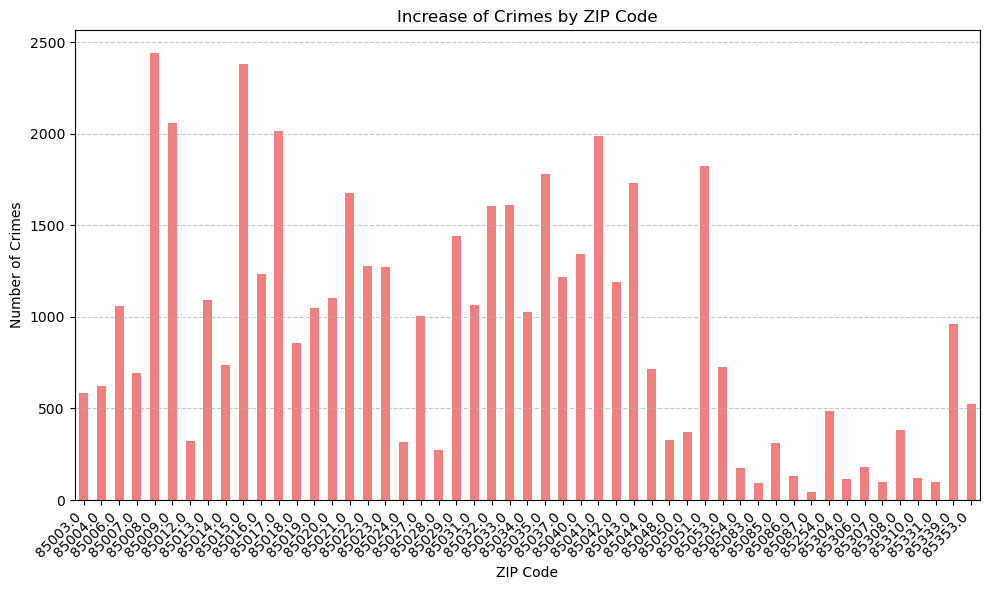

In [28]:
# filter out zip codes with fewer than 100 crimes
sum_changes_worse = sum_changes_zip[zip_counts > 75]

# create a bar plot
plt.figure(figsize=(10, 6))  # adjust figure size
sum_changes_worse.plot(kind='bar', color='lightcoral')  # soften color
plt.title('Increase of Crimes by ZIP Code')  # title
plt.xlabel('ZIP Code')  # x-axis label
plt.ylabel('Number of Crimes')  # y-axis label
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # add grid lines
plt.tight_layout()  # adjust layout to prevent overlap
plt.show()

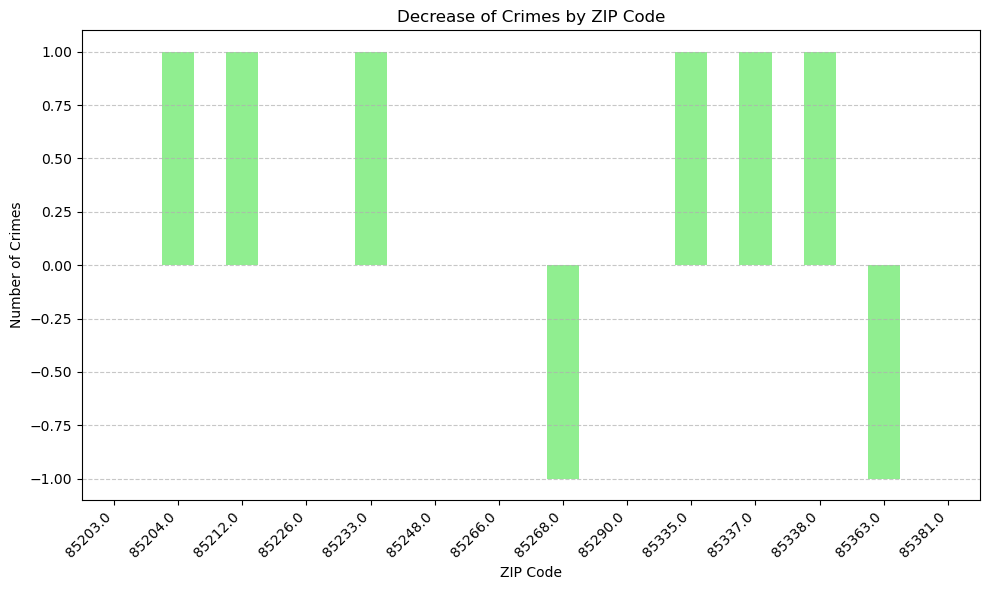

In [29]:
# filter out zip codes with fewer than 100 crimes
sum_changes_better = sum_changes_zip[zip_counts <= 1]

# create a bar plot
plt.figure(figsize=(10, 6))  # adjust figure size
sum_changes_better.plot(kind='bar', color='lightgreen')  # soften color
plt.title('Decrease of Crimes by ZIP Code')  # title
plt.xlabel('ZIP Code')  # x-axis label
plt.ylabel('Number of Crimes')  # y-axis label
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # add grid lines
plt.tight_layout()  # adjust layout to prevent overlap
plt.show()

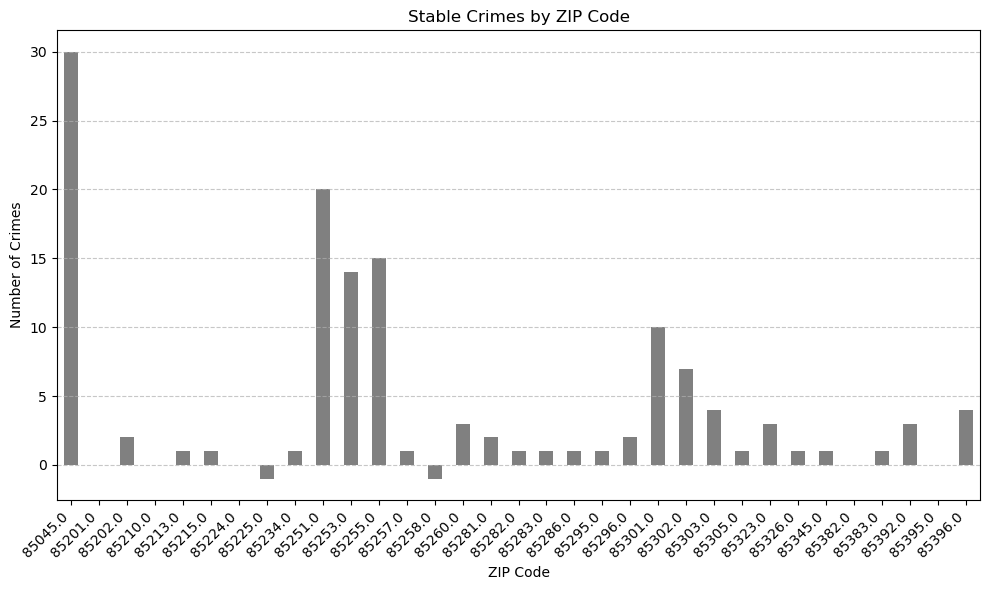

In [30]:
# filter out zip codes with fewer than 100 crimes
sum_changes_stable = sum_changes_zip[(zip_counts > 1) & (zip_counts < 75)]

# create a bar plot
plt.figure(figsize=(10, 6))  # adjust figure size
sum_changes_stable.plot(kind='bar', color='grey')  # soften color
plt.title('Stable Crimes by ZIP Code')  # title
plt.xlabel('ZIP Code')  # x-axis label
plt.ylabel('Number of Crimes')  # y-axis label
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # add grid lines
plt.tight_layout()  # adjust layout to prevent overlapdata
plt.show()

Let's take a look at the number of crimes happening by premise type. We'll stick to residential areas.

In [31]:
crime_type_by_premise = dat.groupby(['PREMISE TYPE', 'UCR CRIME CATEGORY']).size()
crime_type_by_premise

PREMISE TYPE                   UCR CRIME CATEGORY 
"A                             BURGLARY                 1
ABANDONED/CONDEMNED STRUCTURE  AGGRAVATED ASSAULT       3
                               BURGLARY                 2
                               DRUG OFFENSE             2
                               RAPE                     2
                                                     ... 
WAREHOUSE / FACTORY            BURGLARY               124
                               DRUG OFFENSE            12
                               LARCENY-THEFT          177
                               MOTOR VEHICLE THEFT     16
                               ROBBERY                  2
Length: 535, dtype: int64

In [32]:
# let's explore family homes
crime_type_by_premise.loc['SINGLE FAMILY HOUSE']

UCR CRIME CATEGORY
AGGRAVATED ASSAULT                        2033
ARSON                                       83
BURGLARY                                 12600
DRUG OFFENSE                               568
LARCENY-THEFT                             6836
MOTOR VEHICLE THEFT                       2305
MURDER AND NON-NEGLIGENT MANSLAUGHTER       64
RAPE                                       609
ROBBERY                                    230
dtype: int64

In [33]:
# and apartments
crime_type_by_premise.loc['APARTMENT']

UCR CRIME CATEGORY
AGGRAVATED ASSAULT                       2167
ARSON                                      46
BURGLARY                                 3895
DRUG OFFENSE                              563
LARCENY-THEFT                            5517
MOTOR VEHICLE THEFT                      1861
MURDER AND NON-NEGLIGENT MANSLAUGHTER      44
RAPE                                      523
ROBBERY                                   341
dtype: int64

In [34]:
# townhomes
crime_type_by_premise.loc['CONDO / TOWNHOUSE']

UCR CRIME CATEGORY
AGGRAVATED ASSAULT                        99
ARSON                                      4
BURGLARY                                 509
DRUG OFFENSE                              32
LARCENY-THEFT                            693
MOTOR VEHICLE THEFT                      151
MURDER AND NON-NEGLIGENT MANSLAUGHTER      3
RAPE                                      25
ROBBERY                                   14
dtype: int64

In [35]:
# data needs some cleaning... including to show larceny increase for single family housING
crime_type_by_premise.loc['SINGLE FAMILY HOUSING']

UCR CRIME CATEGORY
BURGLARY            2
LARCENY-THEFT    1070
dtype: int64